In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split 
import warnings
%matplotlib inline
pd.options.display.max_columns=999
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import sklearn

* Loading the dataset

In [2]:
df = pd.read_csv('train.csv', parse_dates=True , index_col=0)

In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* Extract hour,month,weekday and year from index column

In [4]:
df['hour'] = df.index.hour

In [5]:
df['month'] = df.index.month

In [6]:
df['weekday'] = df.index.weekday
df['year'] = df.index.year

In [7]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,weekday,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5,2011


* Create a heatmap for the correlation

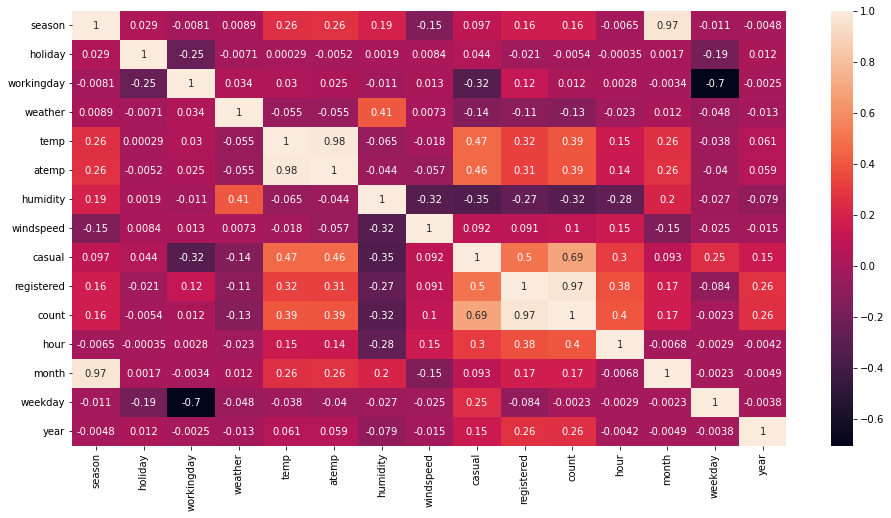

In [8]:
plt.figure(figsize=(16,8))

sns.heatmap(df.corr(), annot=True )
plt.show()

* Casual + Registered = count , so we can drop casual and registired and only use count for our model prediction
* atemp and temp are simliar, I used temp in my project(you can choose one of them)
* drop windspeed column

In [9]:
df.drop(['casual','registered','atemp','windspeed'], axis=1,inplace=True)

In [10]:
df.head()

,season,holiday,workingday,weather,temp,humidity,count,hour,month,weekday,year
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,16,0,1,5,2011
2011-01-01 01:00:00,1,0,0,1,9.02,80,40,1,1,5,2011
2011-01-01 02:00:00,1,0,0,1,9.02,80,32,2,1,5,2011
2011-01-01 03:00:00,1,0,0,1,9.84,75,13,3,1,5,2011
2011-01-01 04:00:00,1,0,0,1,9.84,75,1,4,1,5,2011


* Define X and y, then split the data.

In [11]:
X=df.drop('count',axis=1)
y=df['count']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

* Exploratary Data Analysis(EDA)to explore the data 

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

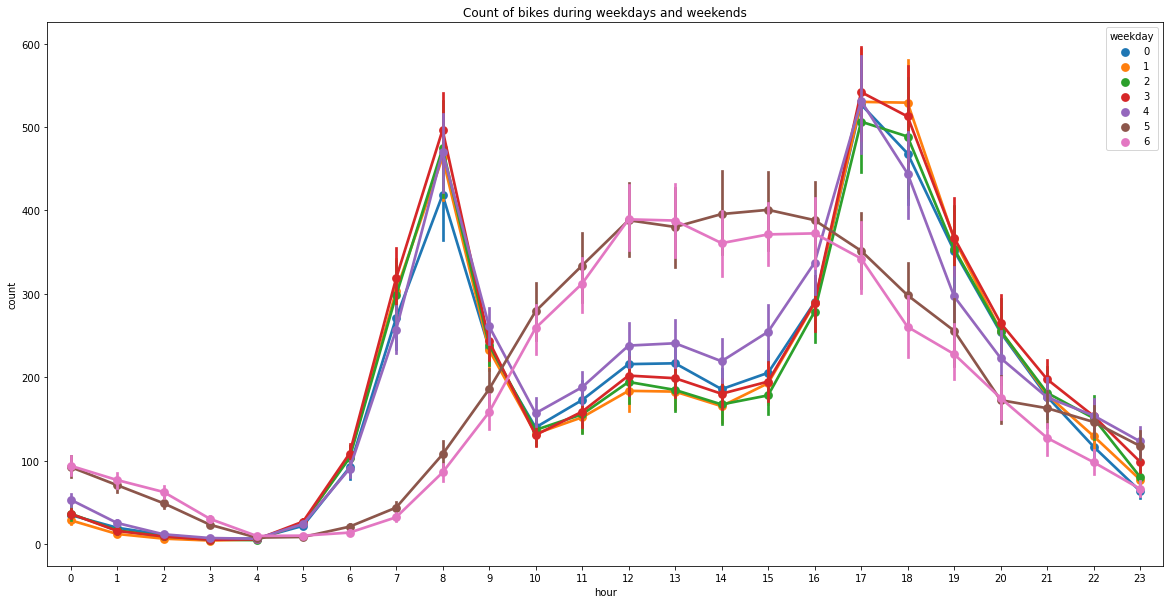

In [14]:
fig , ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=X_train,x = 'hour', y=y_train, hue='weekday' , ax=ax)
ax.set(title = 'Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

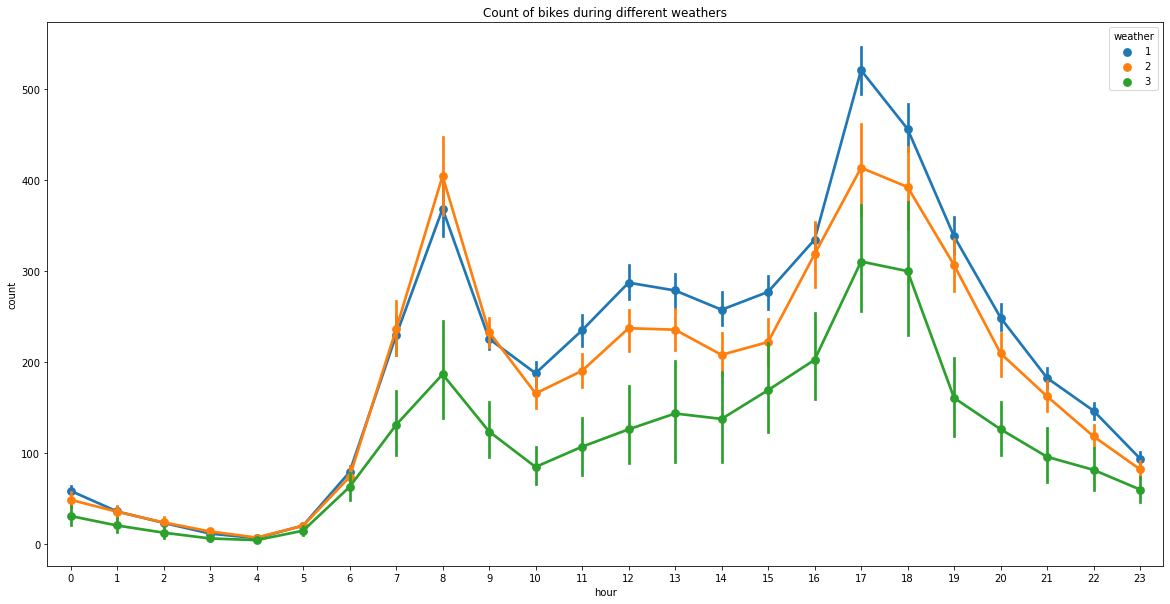

In [15]:
fig , ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=X_train,x = 'hour', y=y_train, hue='weather' , ax=ax)
ax.set(title = 'Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

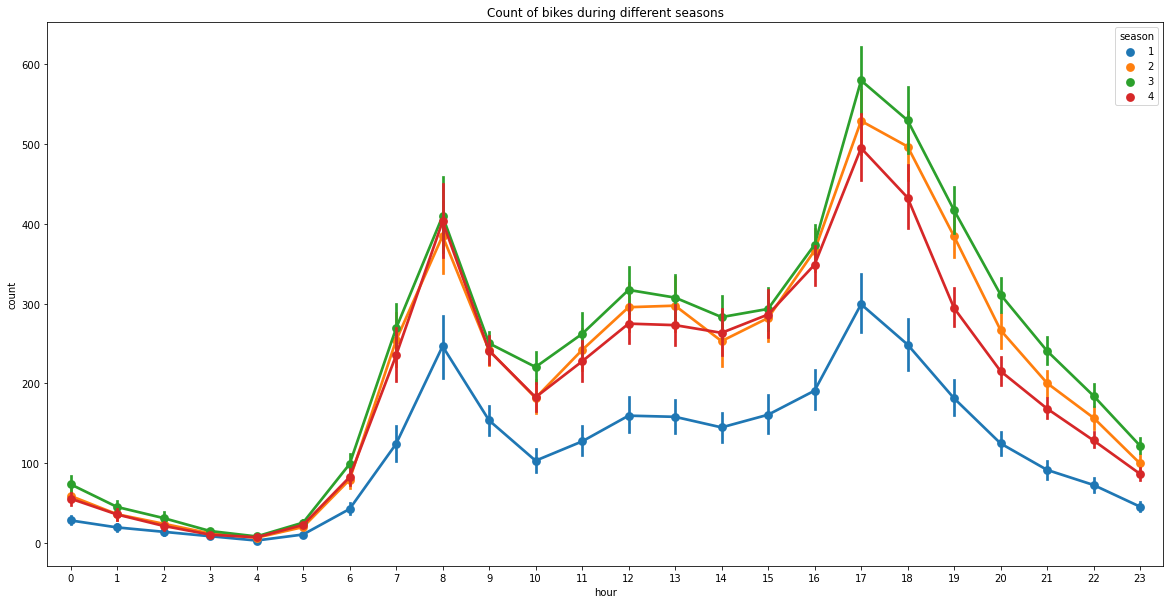

In [16]:
fig , ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=X_train,x = 'hour', y=y_train, hue='season' , ax=ax)
ax.set(title = 'Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

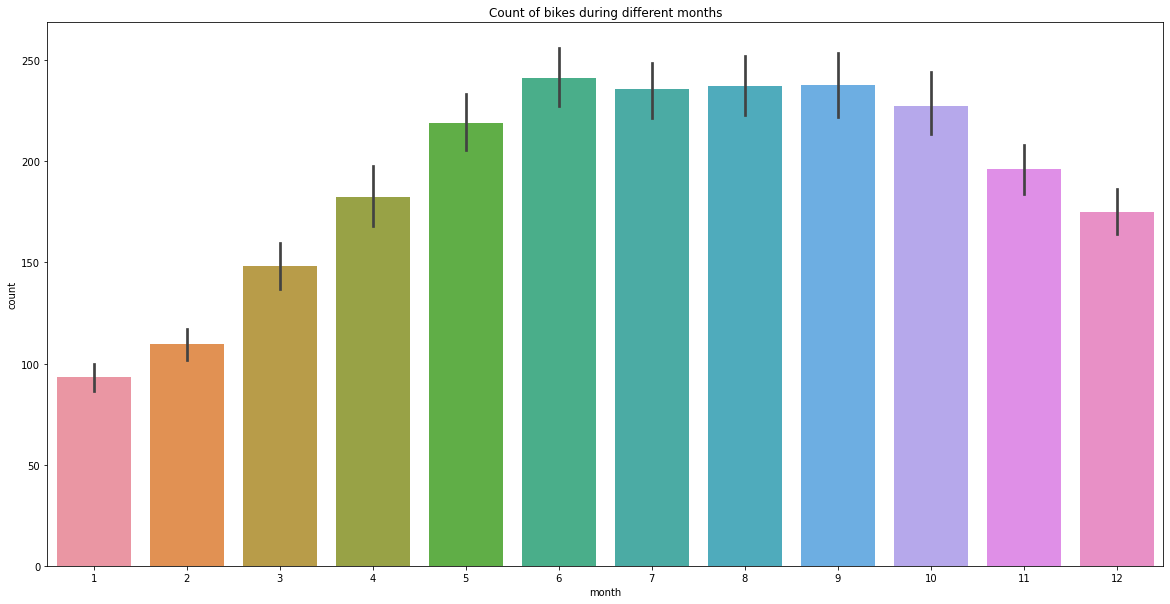

In [17]:
fig , ax = plt.subplots(figsize=(20,10))
sns.barplot(data=X_train,x = 'month', y=y_train, ax=ax)
ax.set(title = 'Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different months')]

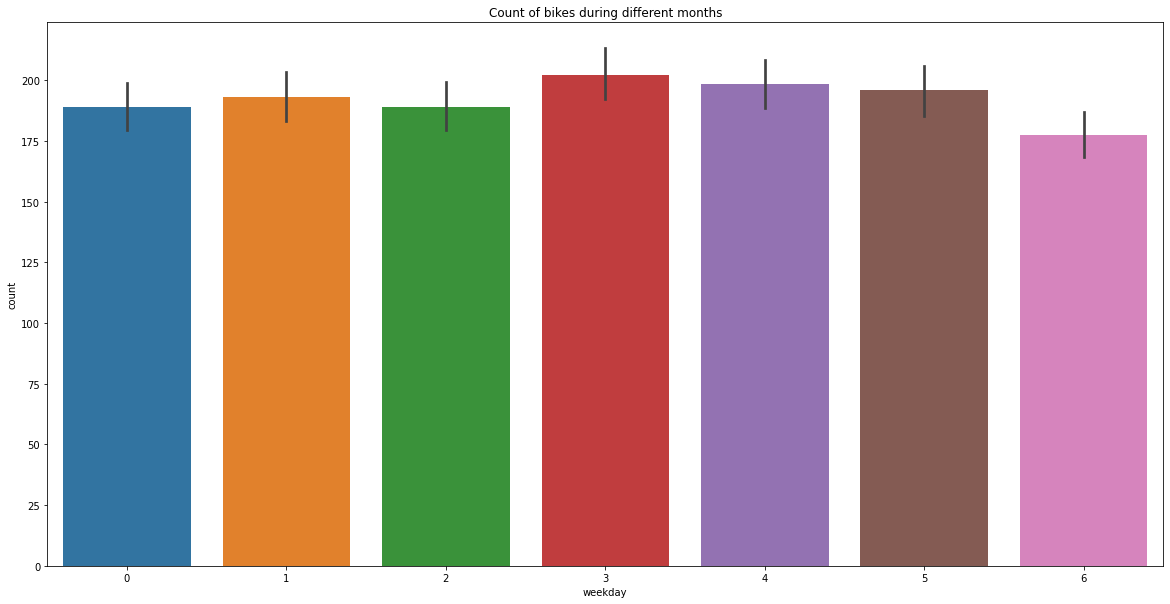

In [18]:
fig , ax = plt.subplots(figsize=(20,10))
sns.barplot(data=X_train,x = 'weekday', y=y_train, ax=ax)
ax.set(title = 'Count of bikes during different months')

C:\Users\nadim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nadim\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


[Text(0.5, 1.0, 'theoratical quantile')]

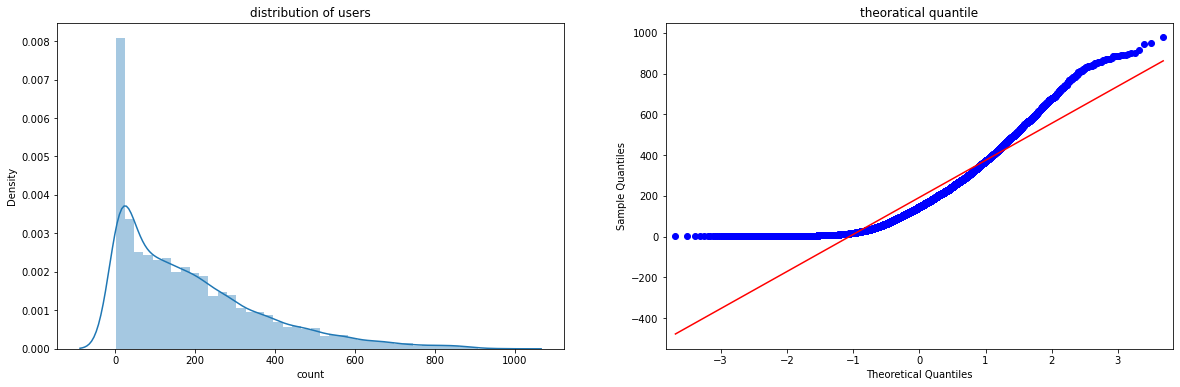

In [19]:
from statsmodels.graphics.gofplots import qqplot
fig ,(ax1,ax2)= plt.subplots(ncols=2,figsize=(20,6))
sns.distplot(y_train,ax=ax1)
ax1.set(title='distribution of users')
qqplot(y_train,ax=ax2,line='s')
ax2.set(title='theoratical quantile')

C:\Users\nadim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nadim\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


[Text(0.5, 1.0, 'theoratical quantile')]

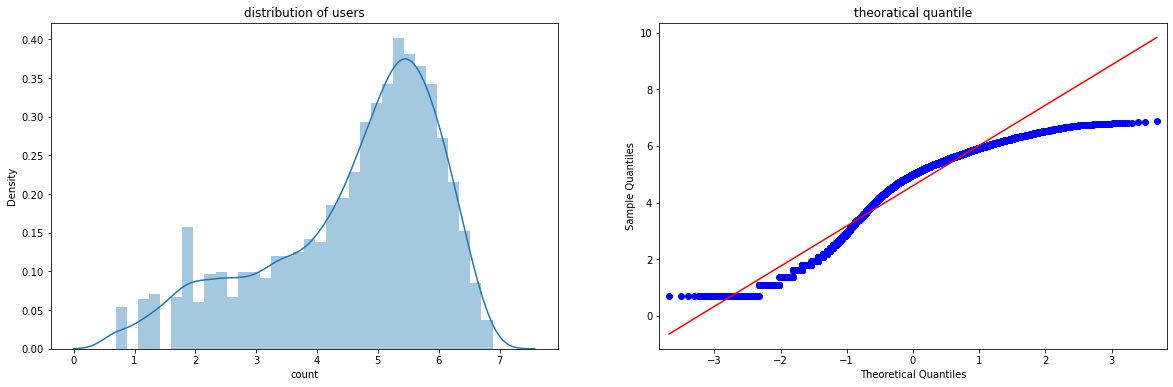

In [20]:
fig ,(ax1,ax2)= plt.subplots(ncols=2,figsize=(20,6))
ylog = np.log1p(y_train)
sns.distplot(ylog,ax=ax1)
ax1.set(title='distribution of users')
qqplot(ylog,ax=ax2,line='s')
ax2.set(title='theoratical quantile')

In [21]:
X_train.head()

,season,holiday,workingday,weather,temp,humidity,hour,month,weekday,year
datetime,,,,,,,,,,
2011-06-18 19:00:00,2,0,0,2,30.34,51,19,6,5,2011
2012-09-08 17:00:00,3,0,0,3,23.78,83,17,9,5,2012
2011-05-01 17:00:00,2,0,0,2,19.68,82,17,5,6,2011
2012-11-19 00:00:00,4,0,1,1,14.76,66,0,11,0,2012
2011-05-16 09:00:00,2,0,1,1,24.60,69,9,5,0,2011


* Feature Engineering ( One hot Encoding , MinMaxScaler)

In [22]:
categorical_columns = ['year','month','hour','holiday','weather','weekday']


In [23]:
column_transformer = ColumnTransformer([
     ('new_Categories', OneHotEncoder(sparse=False,handle_unknown='ignore'),categorical_columns),
   ('Temp',MinMaxScaler(),['temp']),
    #('pt', PolynomialFeatures(degree=8),['hour'])
    ])

In [24]:
X_train_new = column_transformer.fit_transform(X_train)

In [25]:
X_train_new[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.73469388])

In [26]:
X_test_new = column_transformer.transform(X_test)

* Model Training

In [27]:
ylog = np.log1p(y_train)

In [28]:
ylog_test = np.log1p(y_test)

In [31]:
m = LinearRegression()

In [32]:
m.fit(X_train_new,ylog)

LinearRegression()

In [33]:
m.score(X_train_new,ylog)

0.8351810392147565

In [34]:
m.score(X_test_new,ylog_test)

0.8229964436185754

In [35]:
predictions = m.predict(X_test_new)

In [36]:
predictions

array([5.93545532, 5.70643616, 4.15637207, ..., 0.97741699, 4.98686218,
       2.92591858])

In [37]:
ypred = np.exp(predictions)-1
ypred

array([377.21216539, 299.79716201,  62.83949676, ...,   1.65758281,
       145.47608644,  17.65135092])

In [38]:


np.sqrt(mean_squared_log_error(y_test, ypred))

0.5957640507794575

In [39]:
from sklearn.model_selection import cross_val_score
cross_r2_lin = cross_val_score(m,  #the model that we want to evaluate
                               
                               X_train_new, # X_train data
                               ylog,    # ytrain
                               cv=5,      # the number of folds that you want
                               scoring ='r2',  # the metric that you want to evaluate
                               verbose=3)

[CV] END ................................ score: (test=0.837) total time=   0.0s
[CV] END ................................ score: (test=0.826) total time=   0.0s
[CV] END ................................ score: (test=0.843) total time=   0.0s
[CV] END ................................ score: (test=0.825) total time=   0.0s
[CV] END ................................ score: (test=0.825) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [40]:
cross_r2_lin.mean()

0.831256199138495

# Submission to kaggle

In [41]:
test = pd.read_csv('test.csv', index_col=0,parse_dates=True)

In [42]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [43]:
test['hour'] = test.index.hour

In [45]:
test['month'] = test.index.month

In [46]:
test['weekday'] = test.index.weekday
test['year'] = test.index.year

In [47]:
test.drop(['atemp','windspeed'],axis=1,inplace=True)

In [48]:
test

,season,holiday,workingday,weather,temp,humidity,hour,month,weekday,year
datetime,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,56,0,1,3,2011
2011-01-20 01:00:00,1,0,1,1,10.66,56,1,1,3,2011
2011-01-20 02:00:00,1,0,1,1,10.66,56,2,1,3,2011
2011-01-20 03:00:00,1,0,1,1,10.66,56,3,1,3,2011
2011-01-20 04:00:00,1,0,1,1,10.66,56,4,1,3,2011
...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,60,19,12,0,2012
2012-12-31 20:00:00,1,0,1,2,10.66,60,20,12,0,2012
2012-12-31 21:00:00,1,0,1,1,10.66,60,21,12,0,2012


In [49]:
test.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
hour          0
month         0
weekday       0
year          0
dtype: int64

In [50]:
test_new= column_transformer.transform(test)

In [51]:
test_new[0]

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.24489796])

In [52]:
count=m.predict(test_new)

In [53]:
test_pred = np.exp(count)-1
test_pred

array([ 16.29659469,   8.51092755,   4.71304454, ..., 167.78599181,
       130.26025173,  86.25292066])

In [54]:
test['count'] = test_pred

In [55]:
test['count']

datetime
2011-01-20 00:00:00     16.296595
2011-01-20 01:00:00      8.510928
2011-01-20 02:00:00      4.713045
2011-01-20 03:00:00      2.467305
2011-01-20 04:00:00      1.633966
                          ...    
2012-12-31 19:00:00    275.959379
2012-12-31 20:00:00    202.337084
2012-12-31 21:00:00    167.785992
2012-12-31 22:00:00    130.260252
2012-12-31 23:00:00     86.252921
Name: count, Length: 6493, dtype: float64

In [56]:
Submission3 = pd.DataFrame(test['count'])

In [57]:
test

,season,holiday,workingday,weather,temp,humidity,hour,month,weekday,year,count
datetime,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,56,0,1,3,2011,16.296595
2011-01-20 01:00:00,1,0,1,1,10.66,56,1,1,3,2011,8.510928
2011-01-20 02:00:00,1,0,1,1,10.66,56,2,1,3,2011,4.713045
2011-01-20 03:00:00,1,0,1,1,10.66,56,3,1,3,2011,2.467305
2011-01-20 04:00:00,1,0,1,1,10.66,56,4,1,3,2011,1.633966
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,60,19,12,0,2012,275.959379
2012-12-31 20:00:00,1,0,1,2,10.66,60,20,12,0,2012,202.337084
2012-12-31 21:00:00,1,0,1,1,10.66,60,21,12,0,2012,167.785992
